# MobileSAM

In [1]:
from mobile_sam import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
import torch
import cv2
import os
from time import sleep

c:\Users\texas\anaconda3\envs\MovieDiff\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\users\texas\desktop\personal\aim24s\bryant\mobilesam\mobile_sam\modeling\tiny_vit_sam.py:656: UserWarning: Overwriting tiny_vit_5m_224 in registry with mobile_sam.modeling.tiny_vit_sam.tiny_vit_5m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
c:\users\texas\desktop\personal\aim24s\bryant\mobilesam\mobile_sam\modeling\tiny_vit_sam.py:656: UserWarning: Overwriting tiny_vit_11m_224 in registry with mobile_sam.modeling.tiny_vit_sam.tiny_vit_11m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
c:\users\texas\desktop\pers

In [2]:
model_type = "vit_t"
sam_checkpoint = "./MobileSAM/weights/mobile_sam.pt"

device = "cuda" if torch.cuda.is_available() else "cpu"

mobile_sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
mobile_sam.to(device=device)
mobile_sam.eval()

predictor = SamPredictor(mobile_sam)

# MobileSAMv2

In [3]:
# import sys
# sys.path.append('./MobileSAM')
# sys.path.append('./MobileSAM/MobileSAMv2')
# from MobileSAMv2.mobilesamv2.promt_mobilesamv2 import ObjectAwareModel
# from MobileSAMv2.mobilesamv2 import sam_model_registry, SamPredictor

# def create_model():
#     Prompt_guided_path='./MobileSAM/MobileSAMv2/PromptGuidedDecoder/Prompt_guided_Mask_Decoder.pt'
#     obj_model_path="./MobileSAM/weights/ObjectAwareModel.pt"
#     ObjAwareModel = ObjectAwareModel(obj_model_path)
#     PromptGuidedDecoder=sam_model_registry['PromptGuidedDecoder'](Prompt_guided_path)
#     mobilesamv2 = sam_model_registry['vit_h']()
#     mobilesamv2.prompt_encoder=PromptGuidedDecoder['PromtEncoder']
#     mobilesamv2.mask_decoder=PromptGuidedDecoder['MaskDecoder']
#     return mobilesamv2,ObjAwareModel

# encoder_path={'efficientvit_l2':'./MobileSAM/weights/l2.pt',
#             'tiny_vit':'./MobileSAM/weights/mobile_sam.pt',
#             'sam_vit_h':'./MobileSAM/weights/sam_vit_h.pt',}

In [4]:
# mobilesamv2, ObjAwareModel=create_model()
# image_encoder=sam_model_registry['efficientvit_l2'](encoder_path['efficientvit_l2'])
# mobilesamv2.image_encoder=image_encoder
# device = "cuda" if torch.cuda.is_available() else "cpu"
# print(device)
# mobilesamv2.to(device=device)
# mobilesamv2.eval()
# predictor = SamPredictor(mobilesamv2)
# # mask_generator = SamAutomaticMaskGenerator(mobilesamv2)

In [5]:
# mask_generator = SamAutomaticMaskGenerator(mobilesamv2)

# Predictor Test

c:\Users\texas\Desktop\Personal\AIM24S\Bryant\test_imgs\labrador.jpg


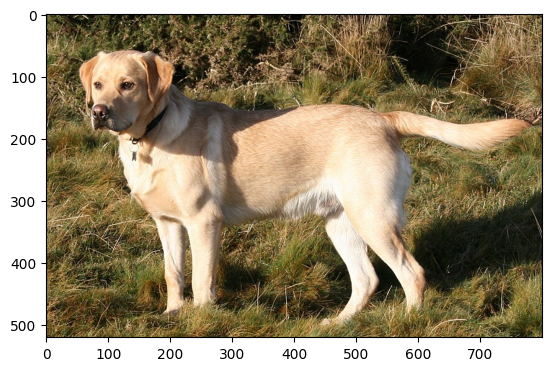

In [6]:
from matplotlib import pyplot as plt
abspath = os.path.abspath("")
print(os.path.join(os.path.dirname(abspath), "Bryant\\test_imgs\\labrador.jpg"))
image = cv2.imread(os.path.join(os.path.dirname(abspath), "Bryant\\test_imgs\\labrador.jpg"))
# turn into ndarray

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [7]:
import numpy as np

In [8]:
# masks = mask_generator.generate(image)
# mask = masks[0]["segmentation"]

In [9]:
input_point = np.array([[300, 250]])
input_label = np.array([1])

predictor.set_image(image)
# masks, _, _ = predictor.predict(point_coords=input_point, point_labels=input_label)
masks, _, _ = predictor.predict()
# turn 0 and 1 to 0 and 255
mask = masks[0]

c:\Users\texas\Desktop\Personal\AIM24S\Bryant\test_imgs\mask.jpg


True

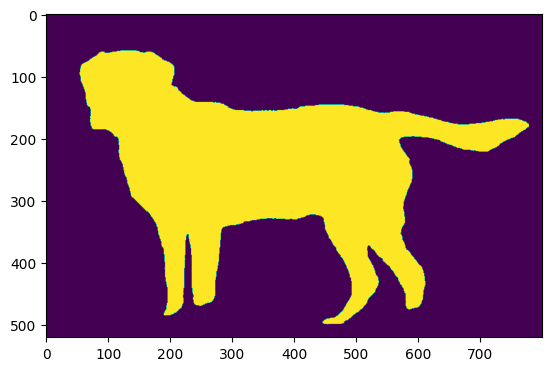

In [10]:
fin_mask = mask.astype(np.uint8) * 255
# print(fin_mask)

plt.imshow(fin_mask)
print(os.path.join(os.path.dirname(abspath), "Bryant\\test_imgs\\mask.jpg"))
cv2.imwrite(os.path.join(os.path.dirname(abspath), "Bryant\\test_imgs\\mask.jpg"), fin_mask)

In [11]:
# GRADIO UPDATES WAY TOO SLOW );

# import gradio as gr



# def showStream():
#     global masks
#     global current_frame
#     # ind = int(ind)
#     # yeild the current frame forever
#     while True:
        
        
#         # turn bool to int
#         # print(len(masks))
        
#         if len(masks) == 0:
#             print("No masks found")
#             yield current_frame, current_frame
#             sleep(0.1)
#             continue
        
#         # if ind >= len(masks):
#         #     ind = len(masks) - 1
        
        
        
#         # turn (3, 480, 640) (480, 640, 3)
#         # masks = np.moveaxis(masks, 0, -1)
#         # print(masks.shape, current_frame.shape)
#         # print(current_frame)
#         # print(masks)
        
#         yield current_frame, masks
#     return None

# # create a gradio interface and output two images
# # iface = gr.Interface(
# #     fn=showStream,
# #     inputs=None,
# #     outputs=["image", "image"],
# # ).queue(concurrency_count=5)
# # iface.launch()

# # create a gradio interface and output two images using blocks
# with gr.Blocks() as demo:
    
#     with gr.Row():
#         out1 = gr.Image(label="Original Image")
#         out2 = gr.Image(label="Masked Image")
#     # slider = gr.Slider(minimum=0, maximum=10, default=0, label="Slider", step=1)
#     btn = gr.Button("Run")
#     btn.click(fn=showStream, inputs=None, outputs=[out1, out2])

# demo.queue()
# # demo.launch()

# get stream of images using cv2
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
current_frame = frame
masks = []

stop_threads = True
sleep(1)
stop_threads = False

mask_ind = 0

def updateMasks():
    global masks
    global mask_ind
    global current_frame
    while True:
        global stop_threads
        if stop_threads:
            break
        predictor.set_image(current_frame)
        # predictor.set_image(image)
        tmasks, _, _ = predictor.predict()
        
        if len(tmasks) == 0:
            # print("No masks found")
            continue
        
        if mask_ind >= len(tmasks):
            mask_ind = len(tmasks) - 1
        
        tmasks = tmasks[mask_ind].astype(np.uint8)
        # turn 0 and 1 to 0 and 255
        tmasks = tmasks * 255
        # turn into 3 channels
        masks = np.stack([tmasks] * 3, axis=-1)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# create a thread to update the masks

def updateFrame():
    global current_frame
    global cap
    while True:
        global stop_threads
        if stop_threads:
            break
        ret, frame = cap.read()
        cv2.imshow("frame", frame)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        current_frame = frame        
    
        if not ret:
            print("Error: failed to capture image")
            break
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
    
def showMask():
    global masks
    while True:
        global stop_threads
        if stop_threads:
            break
        if len(masks) == 0:
            # print("No masks found")
            continue
        cv2.imshow("masks", masks)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

import threading
t1 = threading.Thread(target=updateFrame)
t1.start()
sleep(1)
t2 = threading.Thread(target=updateMasks)
t2.start()
sleep(1)
t3 = threading.Thread(target=showMask)
t3.start()

while True:
    # get mask index from user
    mask_ind = int(input("Enter mask index: "))

ValueError: invalid literal for int() with base 10: ''

In [ ]:
stop_threads = True

cap.release()
cv2.destroyAllWindows()

3.50.2
